In [9]:
import os

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline


In [10]:
heart = pd.read_csv("heart.csv")
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [11]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
temp = (heart.groupby(['target']))['cp'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "target", y = "percentage", hue = "cp", heart = temp)\
.set_title("Chest Pain vs Heart Disease")

ValueError: Could not interpret input 'target'

In [13]:
#plt.figure(figsize=(14,10))
#sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
# plt.show()

In [14]:
print ("Minimum age to Maximum age per disease type")

heart.groupby(["target", ])["age"].min().astype(str) + ', ' +  heart.groupby(["target", ])["age"].max().astype(str)

Minimum age to Maximum age per disease type


target
0    35, 77
1    29, 76
Name: age, dtype: object

In [15]:
heart.groupby('cp',as_index=False)['target'].mean()

,cp,target
0,0,0.272727
1,1,0.820000
2,2,0.793103
3,3,0.695652


In [16]:
heart.groupby('slope',as_index=False)['target'].mean()

,slope,target
0,0,0.428571
1,1,0.350000
2,2,0.753521


In [17]:
# checking columns for missing values, none found
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
# Getting the target variable
X, y = heart.iloc[:, :-1], heart.iloc[:, -1]
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [19]:
#splitting the data for analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2606)
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


In [20]:
#X_scaler = StandardScaler().fit(X_train)
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [21]:
# scale feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\bimic\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\bimic\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\bimic\Anaconda3\envs\PythonWebMongo\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [22]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
   
    # initiating model
    model = classifier(**kwargs)
    
    # training model
    model.fit(X_train,y_train)
    
    # checking accuracy and printing results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

Train accuracy: 99.53%
Test accuracy: 75.82%


C:\Users\bimic\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


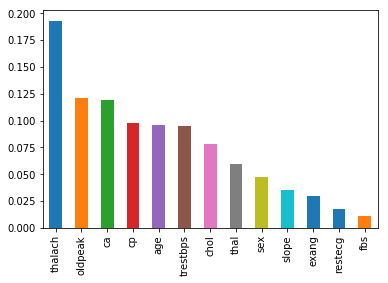

In [23]:
# Random Forest classifier
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=42)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False).plot.bar()

In [24]:
# tuned Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, n_estimators=110, random_state=42)

Train accuracy: 100.00%
Test accuracy: 90.11%


In [25]:
# KNN
model = train_model(X_train, y_train.ravel(), X_test, y_test, KNeighborsClassifier)

Train accuracy: 84.43%
Test accuracy: 83.52%


In [26]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, y_train.ravel(), X_test, y_test, KNeighborsClassifier, n_neighbors= i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 81.32%
n_neigbors = 2
Train accuracy: 85.85%
Test accuracy: 79.12%
n_neigbors = 3
Train accuracy: 87.26%
Test accuracy: 84.62%
n_neigbors = 4
Train accuracy: 83.02%
Test accuracy: 82.42%
n_neigbors = 5
Train accuracy: 84.43%
Test accuracy: 83.52%
n_neigbors = 6
Train accuracy: 83.02%
Test accuracy: 87.91%
n_neigbors = 7
Train accuracy: 84.91%
Test accuracy: 86.81%
n_neigbors = 8
Train accuracy: 83.49%
Test accuracy: 86.81%
n_neigbors = 9
Train accuracy: 83.49%
Test accuracy: 87.91%


Train accuracy: 100.00%
Test accuracy: 69.23%


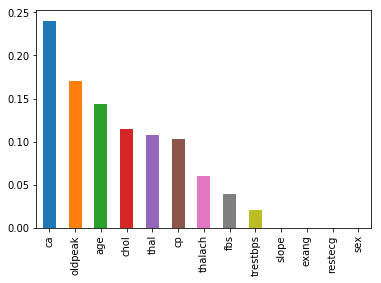

In [29]:
# Decision Tree
model = train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, random_state=42)

# plot feature importances
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False).plot.bar()


In [30]:
# Check optimal 'max_depth' parameter
for i in range(1,8):
    print("max_depth = "+str(i))
    train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, max_depth=i, random_state=42)

max_depth = 1
Train accuracy: 74.06%
Test accuracy: 72.53%
max_depth = 2
Train accuracy: 77.83%
Test accuracy: 84.62%
max_depth = 3
Train accuracy: 84.43%
Test accuracy: 82.42%
max_depth = 4
Train accuracy: 87.74%
Test accuracy: 74.73%
max_depth = 5
Train accuracy: 90.57%
Test accuracy: 67.03%
max_depth = 6
Train accuracy: 93.40%
Test accuracy: 69.23%
max_depth = 7
Train accuracy: 97.17%
Test accuracy: 72.53%


In [31]:
# Logistic Regression
model = train_model(X_train, y_train, X_test, y_test, LogisticRegression)

Train accuracy: 84.43%
Test accuracy: 91.21%


C:\Users\bimic\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
# Vector Machines
model = train_model(X_train, y_train, X_test, y_test, SVC)

Train accuracy: 91.04%
Test accuracy: 86.81%


In [33]:
#Gaussian Naive Bayes
model = train_model(X_train, y_train, X_test, y_test, GaussianNB)

Train accuracy: 78.77%
Test accuracy: 91.21%


In [34]:
# tuned SVM
model = train_model(X_train, y_train, X_test, y_test, SVC, C=0.05, kernel='linear')

Train accuracy: 83.02%
Test accuracy: 90.11%


In [35]:
# Creat an empty list
accuracy = []

# Classifiers
classifiers = ['Random Forests', 'KNN', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Decision Trees']

# list of classifiers with parameters
models = [RandomForestClassifier(n_estimators=110, random_state=42),KNeighborsClassifier(n_neighbors=5), LogisticRegression(), 
        GaussianNB(), SVC(C=0.05, kernel='linear'),DecisionTreeClassifier(max_depth=6, random_state=42) ]
4

# append to list
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)

C:\Users\bimic\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
# Accuracy dataframe
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
Random Forests,0.901099
KNN,0.835165
Logistic Regression,0.912088
Naive Bayes,0.912088
SVM,0.901099
Decision Trees,0.692308


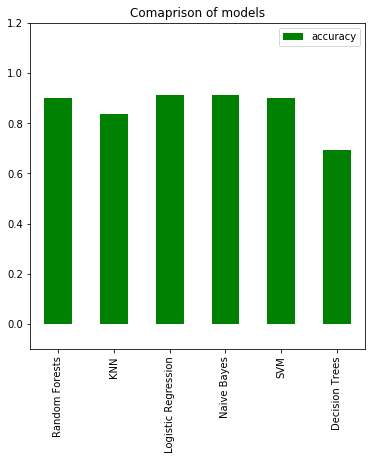

In [37]:
fig =summary.plot(kind='bar',title='Comaprison of models',color='g',figsize =(6,6),ylim=[-0.1,1.2]).get_figure()
fig.savefig('image.png')

In [40]:
# linear regression
X = heart["cp"].values.reshape(-1, 1)
y = heart["chol"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (303, 1) (303, 1)


Text(0, 0.5, 'Cholesterol')

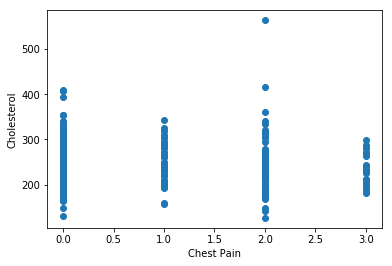

In [41]:
plt.scatter(X, y)
plt.xlabel("Chest Pain")
plt.ylabel("Cholesterol")


In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")



In [ ]:
model.score(X_test, y_test)

In [ ]:
from sklearn.datasets import make_regression

n_features = 13
X, y = make_regression(n_samples=303, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)
print(X.shape)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

In [ ]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [ ]:
from numpy.random import seed
seed(42)

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=3, n_redundant=0, n_informative=3,
                           random_state=42, n_classes=2, n_clusters_per_class=1)

y = y.reshape(-1, 1)

print(X.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
#y_train_categorical

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [ ]:
from tensorflow.keras.layers import Dense
number_inputs = 3
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [ ]:
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

In [ ]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
import numpy as np
new_data = np.array([[0.2, 0.3, 0.4]])
print(f"Predicted class: {model.predict_classes(new_data)}")

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

#Initialising ANN
classifier = Sequential()

#Adding the first hidden layer or the input layer
classifier.add(Dense(activation='relu',
                     kernel_initializer='uniform',
                     input_dim=22,
                     units=12))
#Adding the second hidden layer
classifier.add(Dense(activation='relu',
                     kernel_initializer='uniform',
                     units=12))
#Adding the output layer
classifier.add(Dense(activation='sigmoid',
                     kernel_initializer='uniform',
                     units=1))

#Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(classifier.summary())

#Fitting the ANN
history = classifier.fit(X_train, y_train, batch_size=5, epochs=20, verbose=1)
from matplotlib import pyplot as plt
plt.plot(history.history['acc'],'green')
plt.plot(history.history['loss'],'red')
plt.title('Model Accuracy-Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Loss'])
plt.show()

#Predicting the Test set Results
yPred = classifier.predict(XTest)
yPred = (yPred>0.5) #Since output is probability
cm = confusion_matrix(yTest,yPred)
accuracy = accuracy_score(yTest,yPred)
print(" Neural Network Classifier :")
print("Accuracy = ", accuracy)
print(cm)